In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv
import codecs
 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# Pandasでの表示が省略されないように設定
pd.set_option("max_columns", 100)
pd.set_option('max_rows',1000)
pd.set_option('max_info_columns',100)

In [2]:
%load_ext rpy2.ipython

In [3]:
full_model = pd.read_csv("full_model.csv")

In [4]:
full_model

,Price_as_tested,Hp,AWD,SUV,Luxuary,Curb Weight(lb),Hybrid(option),exp_brand
0,31600.0,201,0,0,1,3100,0,0
1,51425.0,290,1,1,1,4200,1,0
2,40100.0,279,1,1,1,3850,0,0
3,58400.0,310,1,0,1,3930,1,0
4,39375.0,206,0,0,1,3480,0,0
5,39375.0,290,1,0,1,3750,0,0
6,60900.0,237,0,0,0,2470,0,1
7,55947.5,280,1,0,0,3700,0,1
8,42995.0,280,1,1,0,4020,0,1
9,37800.0,204,1,0,1,3140,0,1


In [5]:
awd = full_model["AWD"] 
suv = full_model["SUV"] 
luxu = full_model["Luxuary"]
hybrid = full_model["Hybrid(option)"]
exp_brand = full_model["exp_brand"] 

In [6]:
%R -i luxu
%R -i awd
%R -i suv
%R -i hybrid
%R -i exp_brand


In [7]:
full_model.shape

(268, 8)

In [8]:
%R luxu_j<-luxu+runif(268,min=-0.3,max=0.3)
%R awd_j<-awd+runif(268, min=-0.3, max=0.3)
%R suv_j<-suv+runif(268, min=-0.3, max=0.3)
%R hybrid_j<-hybrid+runif(268, min=-0.3, max=0.3)
%R exp_brand_j<-exp_brand+runif(268,min=-0.3, max=0.3)

array([-0.09327863,  0.15837021, -0.27265858,  0.23731092,  0.26889576,
       -0.28454155,  1.0873907 ,  0.84750904,  0.90770066,  0.82297754,
        1.15920273,  1.08527732,  1.0078405 ,  0.73391518,  1.19307221,
        1.23962909,  1.25935382,  0.85071156,  1.01408977,  0.8207763 ,
        0.93605048,  1.04734628,  1.08203362,  1.25490024,  0.73222929,
        1.07478118,  0.9922791 , -0.29095908,  0.14500922,  0.26372442,
       -0.1979909 , -0.03369869,  0.09451801,  0.19225292,  0.85663024,
        1.17487322,  1.07394482,  1.16032962,  1.031809  , -0.17298476,
        0.01787413,  0.05807964, -0.21135317, -0.10079908,  0.27848407,
        0.09605294,  0.0882206 ,  0.08554041, -0.028181  ,  0.12020834,
       -0.29471051, -0.2374734 ,  0.0712063 , -0.05052324,  0.02588526,
       -0.02139049,  0.00550975,  0.06389001,  0.08651164, -0.14325467,
        0.26988994, -0.1015689 ,  0.03678328, -0.05570208, -0.00174119,
       -0.10799573,  0.21490475, -0.03941691, -0.09491379, -0.26

In [9]:
%R -o awd_j
%R -o suv_j
%R -o luxu_j
%R -o exp_brand_j
%R -o hybrid_j

In [10]:
full_model["AWD"] = awd_j
full_model["SUV"] =suv_j
full_model["Luxuary"] = luxu_j
full_model["Hybrid(option)"] = hybrid_j
full_model["exp_brand"] = exp_brand_j

In [12]:
full_model = full_model.drop("Curb Weight(lb)",axis=1)

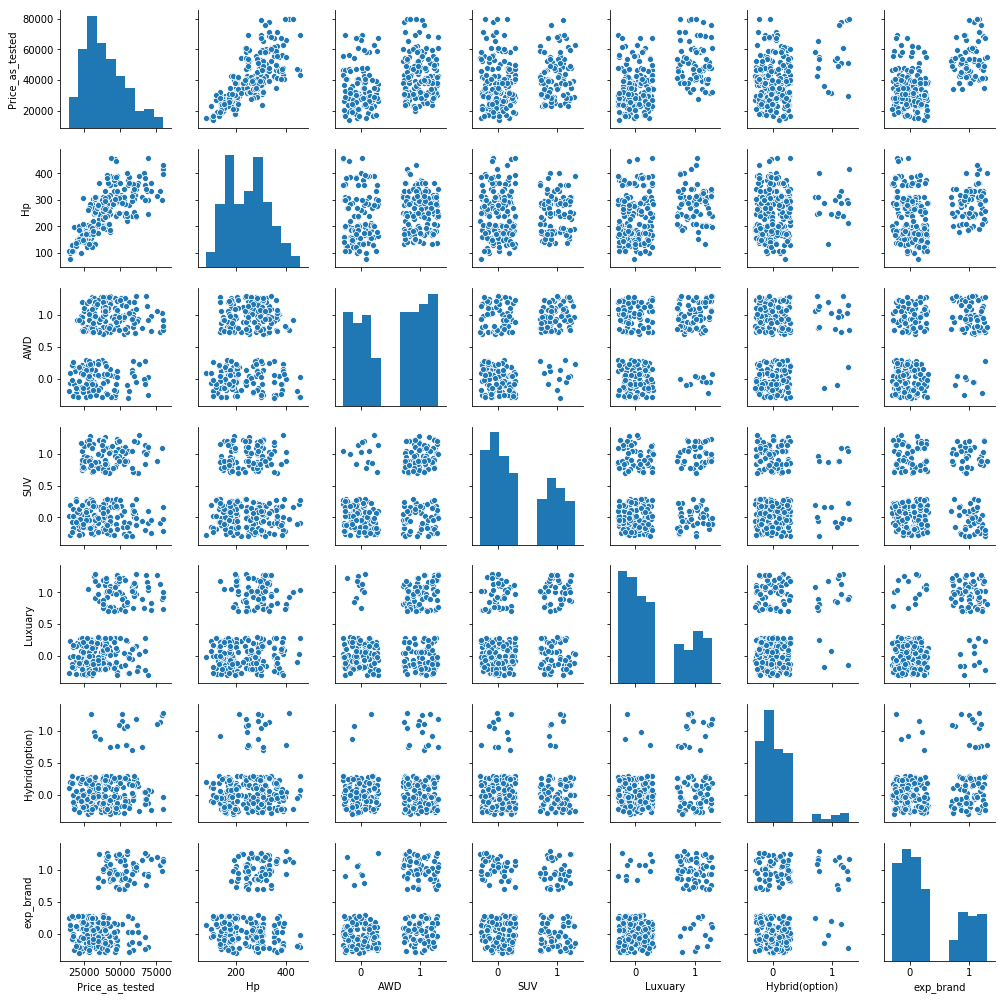

In [13]:
# 散布図行列を出力
# locメソッドで一部の特徴量だけをピックアップ
import seaborn as sns
sns.pairplot(full_model, size=2.0)
plt.show()

In [14]:
full_model.to_csv("full_model.csv")